In [1]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.utils.qt_helper import gui_fnames, gui_fpath
from mesostat.metric.metric import MetricCalculator
from mesostat.utils.hdf5_io import DataStorage
from mesostat.stat.anova import as_pandas_lst, anova_homebrew

from lib.sych.data_fc_db_raw import DataFCDatabase
from lib.sych.plot_helper import imshow_dataset_by_mouse, imshow_dataset_by_session
from lib.sych.metric_helper import metric_by_session

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/pub-2020-exploratory-analysis


In [2]:
# tmp_path = root_path_data if 'root_path_data' in locals() else "./"
params = {}
# params['root_path_data'] = './'
params['root_path_data'] = '/media/alyosha/Data/TE_data/yarodata/sych_preprocessed'
# params['root_path_data'] = gui_fpath('h5path', './')

In [3]:
dataDB = DataFCDatabase(params)

Searching for data files
Extracting trial type names
Extracting data types


In [4]:
ds = DataStorage('sych_result_individual_region.h5')

In [5]:
mc = MetricCalculator(serial=True, verbose=False)

In [6]:
print(dataDB.mice)
print(dataDB.dataTypes)
print(dataDB.trialTypeNames)

{'mvg_9', 'mvg_8', 'mvg_4', 'mvg_7'}
{'raw', 'bn_session', 'bn_trial'}
{'iFA', 'iMISS', 'iNOGO', 'iGO'}


# 1. Noise
## 1.1 SNR via AutoCorrelation

**Plan:**
* AutoCorr[1] is a number that is close to 1 if data is changing slowly, and close to zero if data changes very fast.

**FIXME**:
* Remove Performance above 1
* If performance becomes important, discuss with Y whether to use original or pooled performance, as they differ significantly

In [7]:
metricName = 'autocorr_d1'
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    for datatype in dataDB.get_data_types():
        dataName = metricName + '_' + datatype
        print(dataName)
        metric_by_session(dataDB, mc, ds, mousename, metricName, 'p', datatype=datatype, dataName=dataName)

autocorr_d1_raw


IntProgress(value=0, description='mvg_4', max=11)

autocorr_d1_bn_session


IntProgress(value=0, description='mvg_4', max=11)

autocorr_d1_bn_trial


IntProgress(value=0, description='mvg_4', max=11)

autocorr_d1_raw


IntProgress(value=0, description='mvg_7', max=18)

autocorr_d1_bn_session


IntProgress(value=0, description='mvg_7', max=18)

autocorr_d1_bn_trial


IntProgress(value=0, description='mvg_7', max=18)

autocorr_d1_raw


IntProgress(value=0, description='mvg_8', max=16)

autocorr_d1_bn_session


IntProgress(value=0, description='mvg_8', max=16)

autocorr_d1_bn_trial


IntProgress(value=0, description='mvg_8', max=16)

autocorr_d1_raw


IntProgress(value=0, description='mvg_9', max=21)

autocorr_d1_bn_session


IntProgress(value=0, description='mvg_9', max=21)

autocorr_d1_bn_trial


IntProgress(value=0, description='mvg_9', max=21)

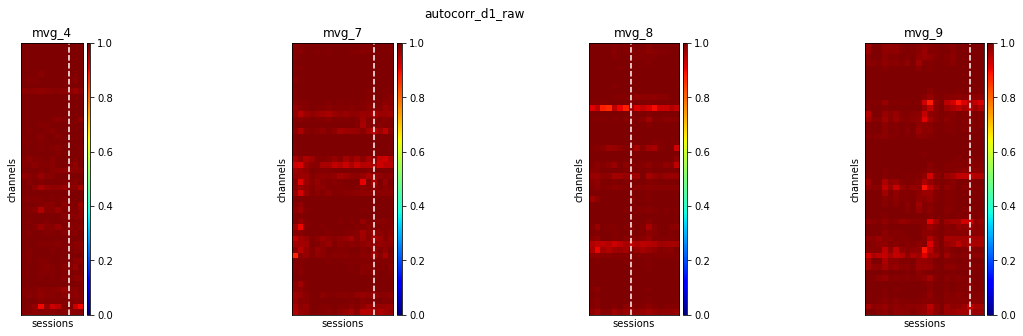

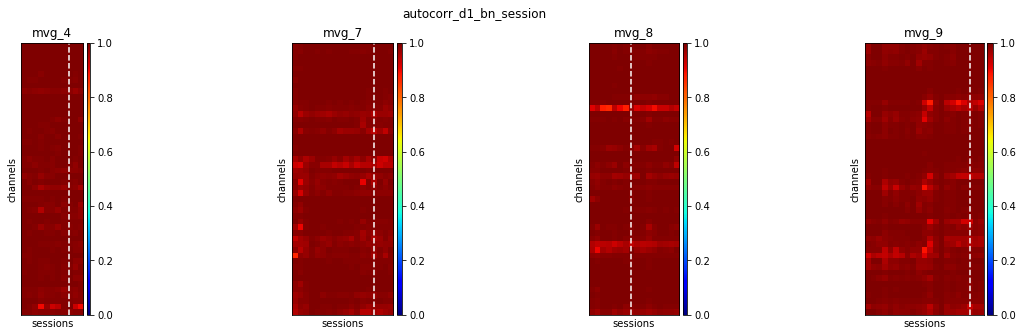

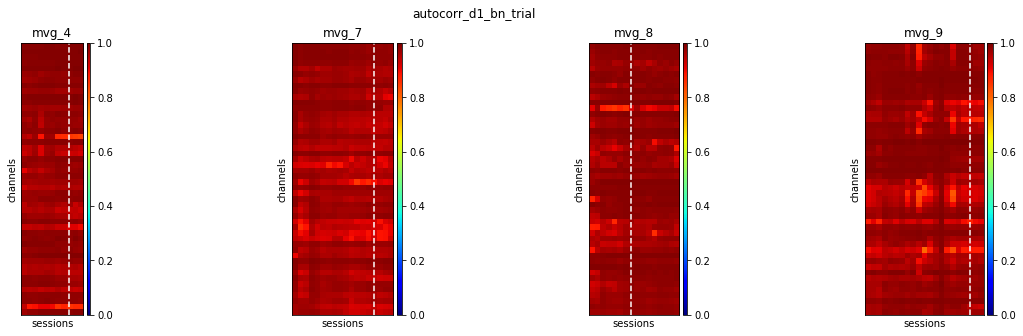

In [8]:
metricName = 'autocorr_d1'
for datatype in dataDB.get_data_types():
    dataName = metricName + '_' + datatype
    imshow_dataset_by_mouse(dataDB, ds, dataName, limits=[0,1])

# 2. Variance

* Across sessions
    - Explained by performance
* Across channels, trials, timesteps
    - Explained by trial type

In [9]:
mousename = 'mvg_4'
trialTypeNames = dataDB.get_trial_type_names()
sessions = dataDB.get_sessions(mousename)

rezLst = []
for session in sessions:
    print(session)
    dataLst = [
        dataDB.get_neuro_data({'session' : session}, datatype='bn_session', trialType=trialType)[0]
        for trialType in trialTypeNames
    ]

    colNames = ('trials', 'timesteps', 'channels')
    dfThis = as_pandas_lst(dataLst, colNames, trialTypeNames, 'trialType')
    dfRez = anova_homebrew(dfThis, 'rez')
    display(dfRez)
    rezLst += [list(dfRez['F'])[1:-1]]

mvg_4_2017_11_10_a


,axis,sumsq,df,meansq,F,pval
0,tot,13290.861314,6428159,0.002068,1.539283,1.110223e-16
1,channels,74.077864,47,1.576125,1173.390578,1.110223e-16
2,trials,4447.089982,582,7.641048,5688.593946,1.110223e-16
3,trialType,53.753788,3,17.917929,13339.508352,1.110223e-16
4,timesteps,82.553579,159,0.519205,386.536744,1.110223e-16
5,err,8633.386101,6427368,0.001343,1.000000,5.002658e-01


mvg_4_2017_11_13_a


,axis,sumsq,df,meansq,F,pval
0,tot,15927.015672,6481919,0.002457,1.201424,1.110223e-16
1,channels,41.056098,47,0.873534,427.115380,1.110223e-16
2,trials,2495.126369,463,5.389042,2634.977727,1.110223e-16
3,trialType,13.370960,3,4.456987,2179.248408,1.110223e-16
4,timesteps,122.051821,159,0.767622,375.329354,1.110223e-16
5,err,13255.410423,6481247,0.002045,1.000000,5.002751e-01


mvg_4_2017_11_14_a


,axis,sumsq,df,meansq,F,pval
0,tot,9959.052820,5529599,0.001801,1.348358,1.110223e-16
1,channels,43.459367,47,0.924667,692.255606,1.110223e-16
2,trials,2238.786853,339,6.604091,4944.176785,1.110223e-16
3,trialType,233.489060,3,77.829687,58267.478383,1.110223e-16
4,timesteps,57.991813,159,0.364728,273.055232,1.110223e-16
5,err,7385.325727,5529051,0.001336,1.000000,5.001397e-01


mvg_4_2017_11_15_a


,axis,sumsq,df,meansq,F,pval
0,tot,3752.558494,2641919,0.001420,1.272851,1.110223e-16
1,channels,53.651212,47,1.141515,1022.942768,1.110223e-16
2,trials,683.620215,119,5.744708,5147.988765,1.110223e-16
3,trialType,30.543716,3,10.181239,9123.684933,1.110223e-16
4,timesteps,36.957562,159,0.232437,208.293560,1.110223e-16
5,err,2947.785789,2641591,0.001116,1.000000,5.000026e-01


mvg_4_2017_11_16_a


,axis,sumsq,df,meansq,F,pval
0,tot,6529.996327,3939839,0.001657,1.664500,1.110223e-16
1,channels,116.901556,47,2.487267,2497.881253,1.110223e-16
2,trials,2383.826355,186,12.816271,12870.962612,1.110223e-16
3,trialType,3.996413,3,1.332138,1337.822447,1.110223e-16
4,timesteps,102.567670,159,0.645080,647.832486,1.110223e-16
5,err,3922.704333,3939444,0.000996,1.000000,5.000271e-01


mvg_4_2017_11_17_a


,axis,sumsq,df,meansq,F,pval
0,tot,3943.367124,3778559,0.001044,2.305122,1.110223e-16
1,channels,79.065581,47,1.682246,3715.715806,1.110223e-16
2,trials,2005.330192,188,10.666650,23560.305862,1.110223e-16
3,trialType,62.105915,3,20.701972,45726.144961,1.110223e-16
4,timesteps,86.347254,159,0.543064,1199.511148,1.110223e-16
5,err,1710.518182,3778162,0.000453,1.000000,5.000217e-01


mvg_4_2017_11_20_a


,axis,sumsq,df,meansq,F,pval
0,tot,12144.142270,3878399,0.003131,-5.639387e+01,1.000000
1,channels,79.519060,47,1.691895,-3.047130e+04,1.000000
2,trials,11795.922631,241,48.945737,-8.815206e+05,1.000000
3,trialType,410.436693,3,136.812231,-2.464010e+06,1.000000
4,timesteps,73.583959,159,0.462792,-8.334962e+03,1.000000
5,err,-215.320073,3877949,-0.000056,1.000000e+00,0.500025


mvg_4_2017_11_21_a


,axis,sumsq,df,meansq,F,pval
0,tot,18105.525407,3747839,0.004831,1.619264,1.110223e-16
1,channels,78.124338,47,1.662220,557.154872,1.110223e-16
2,trials,6720.712066,230,29.220487,9794.333614,1.110223e-16
3,trialType,34.323758,3,11.441253,3834.961546,1.110223e-16
4,timesteps,92.344408,159,0.580782,194.670846,1.110223e-16
5,err,11180.020838,3747400,0.002983,1.000000,5.000208e-01


mvg_4_2017_11_22_a


,axis,sumsq,df,meansq,F,pval
0,tot,14442.794997,5460479,0.002645,1.781125,1.110223e-16
1,channels,125.697946,47,2.674424,1800.960527,1.110223e-16
2,trials,5789.908142,327,17.706141,11923.336224,1.110223e-16
3,trialType,297.572964,3,99.190988,66795.327834,1.110223e-16
4,timesteps,121.606629,159,0.764822,515.031741,1.110223e-16
5,err,8108.009317,5459943,0.001485,1.000000,5.001321e-01


mvg_4_2017_11_23_a


,axis,sumsq,df,meansq,F,pval
0,tot,8361.755320,4454399,0.001877,1.353651,1.110223e-16
1,channels,65.041311,47,1.383858,997.906468,1.110223e-16
2,trials,1950.522566,254,7.679223,5537.524626,1.110223e-16
3,trialType,67.138573,3,22.379524,16137.983290,1.110223e-16
4,timesteps,102.508518,159,0.644708,464.901813,1.110223e-16
5,err,6176.544351,4453936,0.001387,1.000000,5.000507e-01


mvg_4_2017_11_24_a


,axis,sumsq,df,meansq,F,pval
0,tot,6070.002062,3886079,0.001562,3.203642,1.110223e-16
1,channels,62.122783,47,1.321761,2710.939019,1.110223e-16
2,trials,3951.896672,225,17.563985,36023.820438,1.110223e-16
3,trialType,71.490720,3,23.830240,48875.939885,1.110223e-16
4,timesteps,89.984018,159,0.565937,1160.740037,1.110223e-16
5,err,1894.507869,3885645,0.000488,1.000000,5.000252e-01


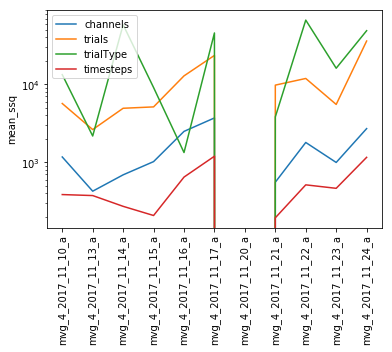

In [10]:
sessions = dataDB.get_sessions(mousename)

names = list(dfRez['axis'])[1:-1]
rezArr = np.array(rezLst).T

fig, ax = plt.subplots()
ax.set_ylabel('mean_ssq')
for name, x in zip(names, rezArr):
    plt.semilogy(x, label=name)
    
ax.set_xticks(np.arange(len(sessions)))
ax.set_xticklabels(sessions, rotation=90)
ax.legend()
plt.show()


# 2. Activity

## 2.1 Variance-based measures

In [11]:
for metricName in ['mean', 'std', 'avg_entropy']:
    for iMouse, mousename in enumerate(sorted(dataDB.mice)):
        for datatype in dataDB.get_data_types():
            dataName = metricName + '_' + datatype
            print(dataName)
            metric_by_session(dataDB, mc, ds, mousename, metricName, 'p', datatype=datatype, dataName=dataName)

mean_raw


IntProgress(value=0, description='mvg_4', max=11)

mean_bn_session


IntProgress(value=0, description='mvg_4', max=11)

mean_bn_trial


IntProgress(value=0, description='mvg_4', max=11)

mean_raw


IntProgress(value=0, description='mvg_7', max=18)

mean_bn_session


IntProgress(value=0, description='mvg_7', max=18)

mean_bn_trial


IntProgress(value=0, description='mvg_7', max=18)

mean_raw


IntProgress(value=0, description='mvg_8', max=16)

mean_bn_session


IntProgress(value=0, description='mvg_8', max=16)

mean_bn_trial


IntProgress(value=0, description='mvg_8', max=16)

mean_raw


IntProgress(value=0, description='mvg_9', max=21)

mean_bn_session


IntProgress(value=0, description='mvg_9', max=21)

mean_bn_trial


IntProgress(value=0, description='mvg_9', max=21)

std_raw


IntProgress(value=0, description='mvg_4', max=11)

std_bn_session


IntProgress(value=0, description='mvg_4', max=11)

std_bn_trial


IntProgress(value=0, description='mvg_4', max=11)

std_raw


IntProgress(value=0, description='mvg_7', max=18)

std_bn_session


IntProgress(value=0, description='mvg_7', max=18)

std_bn_trial


IntProgress(value=0, description='mvg_7', max=18)

std_raw


IntProgress(value=0, description='mvg_8', max=16)

std_bn_session


IntProgress(value=0, description='mvg_8', max=16)

std_bn_trial


IntProgress(value=0, description='mvg_8', max=16)

std_raw


IntProgress(value=0, description='mvg_9', max=21)

std_bn_session


IntProgress(value=0, description='mvg_9', max=21)

std_bn_trial


IntProgress(value=0, description='mvg_9', max=21)

avg_entropy_raw


IntProgress(value=0, description='mvg_4', max=11)

avg_entropy_bn_session


IntProgress(value=0, description='mvg_4', max=11)

avg_entropy_bn_trial


IntProgress(value=0, description='mvg_4', max=11)

avg_entropy_raw


IntProgress(value=0, description='mvg_7', max=18)

avg_entropy_bn_session


IntProgress(value=0, description='mvg_7', max=18)

avg_entropy_bn_trial


IntProgress(value=0, description='mvg_7', max=18)

avg_entropy_raw


IntProgress(value=0, description='mvg_8', max=16)

avg_entropy_bn_session


IntProgress(value=0, description='mvg_8', max=16)

avg_entropy_bn_trial


IntProgress(value=0, description='mvg_8', max=16)

avg_entropy_raw


IntProgress(value=0, description='mvg_9', max=21)

avg_entropy_bn_session


IntProgress(value=0, description='mvg_9', max=21)

avg_entropy_bn_trial


IntProgress(value=0, description='mvg_9', max=21)

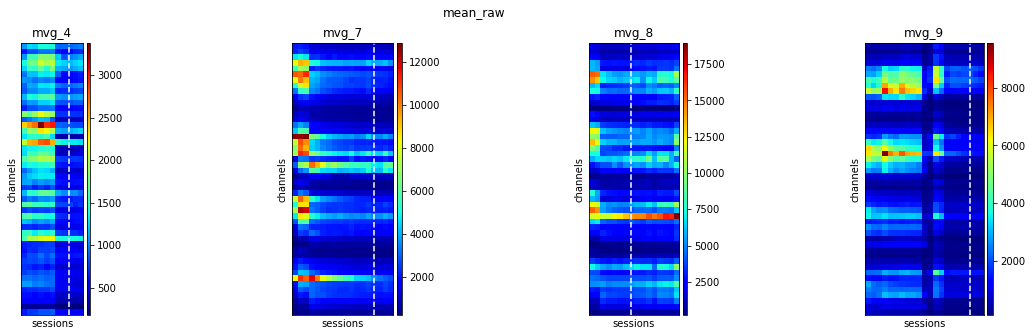

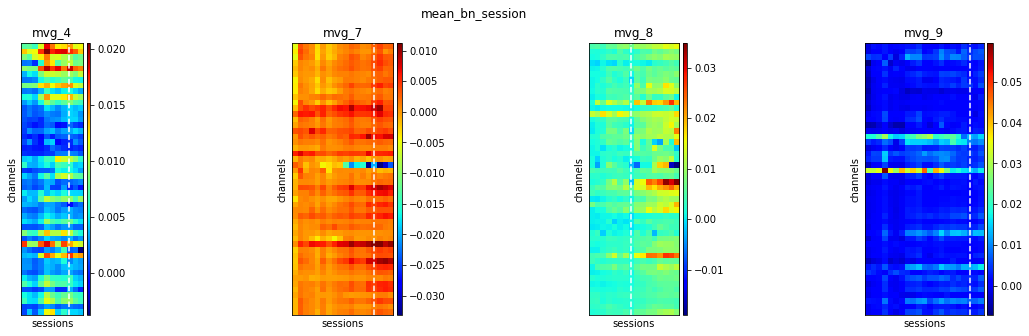

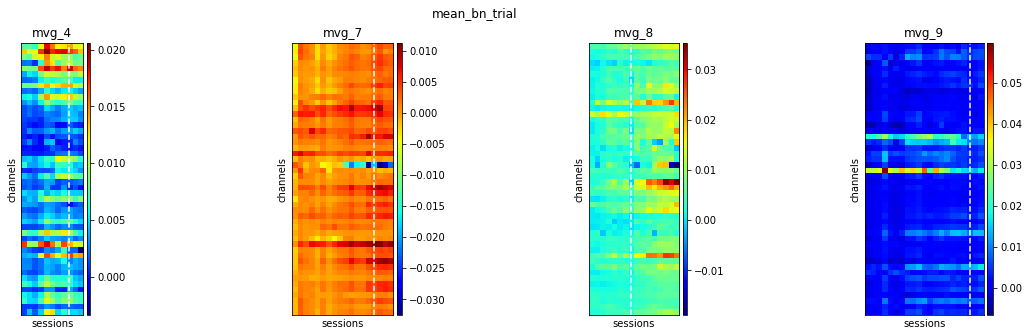

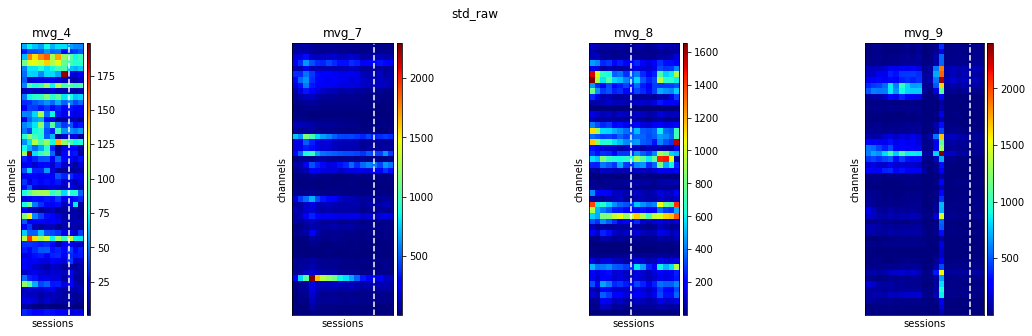

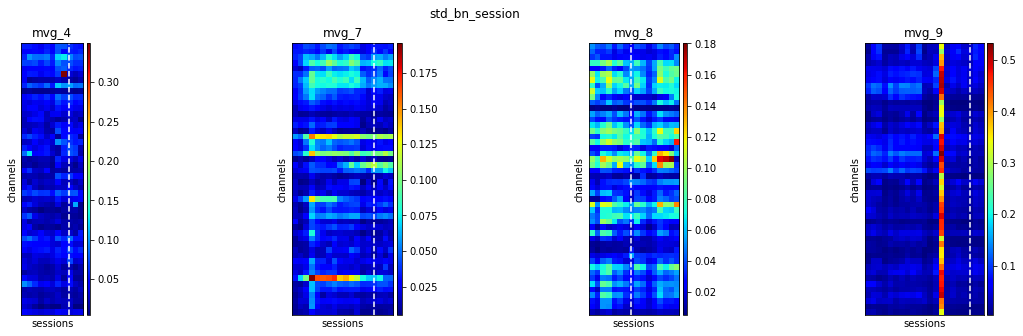

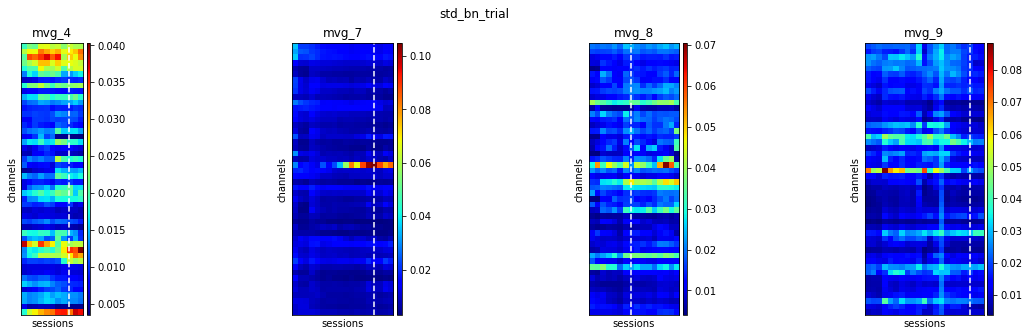

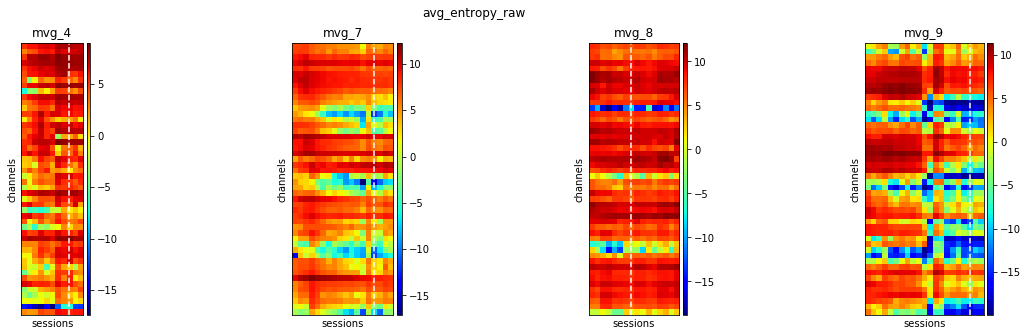

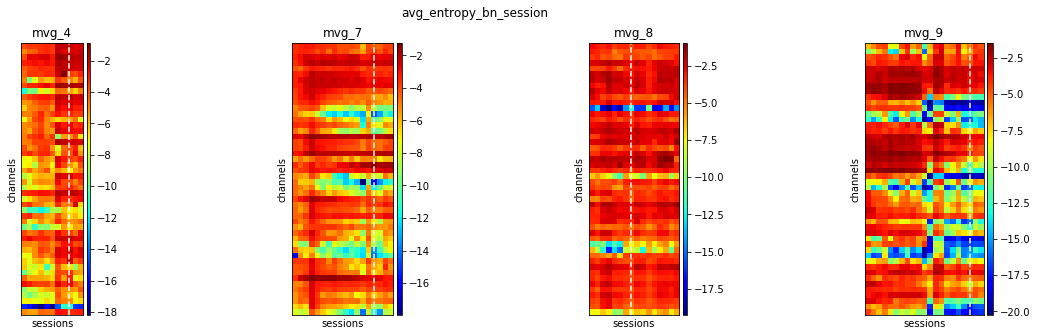

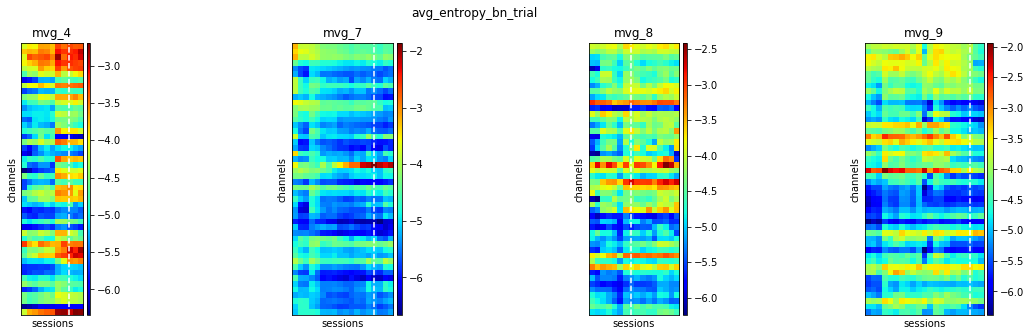

In [12]:
for metricName in ['mean', 'std', 'avg_entropy']:
    for datatype in dataDB.get_data_types():
        dataName = metricName + '_' + datatype
        imshow_dataset_by_mouse(dataDB, ds, dataName)

# 3. Temporal Structure
## 3.1 Mean vs Time

In [13]:
metricName = 'mean'
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    for datatype in dataDB.get_data_types():
        dataName = metricName + '_time_' + datatype
        if datatype == 'raw':
            zscoreDim='rs'
        else:
            zscoreDim=None
        
        metric_by_session(dataDB, mc, ds, mousename, metricName, 'ps',
                          datatype=datatype,
                          dataName=dataName,
                          zscoreDim=zscoreDim)

IntProgress(value=0, description='mvg_4', max=11)

IntProgress(value=0, description='mvg_4', max=11)

IntProgress(value=0, description='mvg_4', max=11)

IntProgress(value=0, description='mvg_7', max=18)

IntProgress(value=0, description='mvg_7', max=18)

IntProgress(value=0, description='mvg_7', max=18)

IntProgress(value=0, description='mvg_8', max=16)

IntProgress(value=0, description='mvg_8', max=16)

IntProgress(value=0, description='mvg_8', max=16)

IntProgress(value=0, description='mvg_9', max=21)

IntProgress(value=0, description='mvg_9', max=21)

IntProgress(value=0, description='mvg_9', max=21)

In [14]:
metricName = 'mean'
for datatype in dataDB.get_data_types(mousename):
    dataName = metricName + '_time_' + datatype
    print(dataName)
    
    imshow_dataset_by_session(dataDB, ds, dataName, limits=None,
                              fig1size=(12, 2), colBased=False, aspect='auto')

TypeError: get_data_types() takes 1 positional argument but 2 were given